In [11]:
import numpy as np
import pandas as pd
from scipy import stats, optimize, interpolate, integrate, signal
import matplotlib.pyplot as plt
from matplotlib import ticker

 - https://www.wolframalpha.com/input?i=int%28%28k%2F%281%2B%28%28k-n%29%2Fn%29*exp%28-r*t%29%29%29%2C+r%29

In [2]:
N0 = 1e3
K = 1e7

In [3]:
def logistic(t, r=1.0, N0=N0, K=K):
    term = np.exp(r*t)
    return K*N0*term/(K + N0*(term - 1))

In [4]:
t = np.linspace(0, 20, 300)
dt = np.diff(t)
N = logistic(t)

In [5]:
dNdt = signal.savgol_filter(N, 31, 7, deriv=1, delta=dt[0])
d2Ndt2 = signal.savgol_filter(N, 31, 7, deriv=2, delta=dt[0])

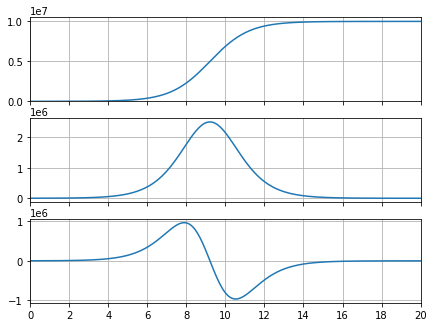

In [19]:
fig, axe = plt.subplots(3, 1, sharex=True, figsize=1.75*np.array([4, 3]))

axe[0].plot(t, N)
axe[0].set_ylim(ymin=0)

axe[1].plot(t, dNdt)

axe[2].plot(t, d2Ndt2)

for i in range(3):
    axe[i].grid()

axe[2].set_xlim([t.min(), t.max()])
axe[2].xaxis.set_major_locator(ticker.MaxNLocator(integer=True))

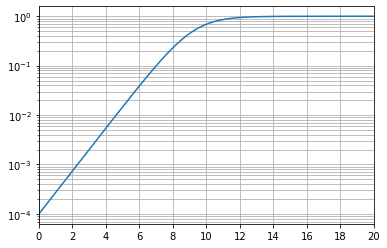

In [15]:
fig, axe = plt.subplots()
axe.semilogy(t, N/K)
axe.grid(which="both")
axe.set_xlim([t.min(), t.max()])
axe.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))